In [68]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import seaborn as sns

In [84]:
df_raw = pd.read_pickle('USGS_raw_data.pickle')
df_raw.describe()

,02111500,03086000,03110685,03110690,03111515,03111520,03112500,03114275,03114280,03150700,...,07290880,07331600,07335500,07337000,07344370,07374000,07374525,08266820,07020850,turbidity
count,2190.000000,2192.000000,2176.000000,2150.000000,2183.000000,2168.000000,2149.000000,2174.000000,2173.000000,2183.000000,...,969.000000,2192.000000,2192.000000,2175.000000,2192.000000,2.173000e+03,2.145000e+03,2190.000000,2162.000000,2133.000000
mean,151.140228,34991.245438,12.570827,15.246465,12.745318,15.517721,17.648641,12.877898,14.179991,17.661947,...,35.721889,4781.018431,8989.775091,13088.583908,23500.898723,5.349627e+05,5.259905e+05,67.024338,20.124968,58.842733
std,156.542523,26976.851624,0.387422,2.678622,0.231245,3.100420,2.238204,0.176629,2.324297,2.608087,...,11.093852,10066.992521,19981.561141,25261.199708,31761.111611,2.566121e+05,2.422678e+05,50.502049,8.743033,35.005728
min,38.400000,4040.000000,11.850000,12.410000,12.080000,12.220000,15.420000,12.140000,11.710000,15.030000,...,13.790000,11.400000,177.000000,443.000000,1150.000000,1.410000e+05,7.170000e+04,22.700000,4.860000,6.800000
25%,77.825000,14300.000000,12.240000,13.320000,12.590000,13.230000,16.210000,12.760000,12.670000,15.980000,...,27.090000,160.000000,778.750000,1825.000000,3845.000000,3.200000e+05,3.280000e+05,39.700000,13.510000,30.000000
50%,112.000000,27000.000000,12.430000,14.180000,12.750000,14.350000,16.730000,12.900000,13.230000,16.630000,...,36.050000,783.000000,2100.000000,4270.000000,10200.000000,5.050000e+05,4.910000e+05,48.600000,19.175000,52.900000
75%,167.000000,48025.000000,12.920000,16.307500,12.900000,16.762500,18.200000,13.010000,14.830000,18.365000,...,44.700000,4022.500000,6890.000000,11700.000000,28200.000000,7.070000e+05,7.070000e+05,69.675000,25.507500,80.300000
max,2300.000000,152000.000000,13.620000,28.790000,13.400000,31.850000,30.950000,13.320000,28.360000,34.010000,...,56.690000,70200.000000,223000.000000,254000.000000,206000.000000,1.330000e+06,1.330000e+06,319.000000,48.770000,208.500000


In [613]:
# remove stations with too many NaNs (1 year out of 6 years):
df = df_raw.dropna(axis=1, thresh=365*5)
df.describe()

,02111500,03086000,03110685,03110690,03111515,03111520,03112500,03114275,03114280,03150700,...,07289000,07331600,07335500,07337000,07344370,07374000,07374525,08266820,07020850,turbidity
count,2190.000000,2192.000000,2176.000000,2150.000000,2183.000000,2168.000000,2149.000000,2174.000000,2173.000000,2183.000000,...,2.191000e+03,2192.000000,2192.000000,2175.000000,2192.000000,2.173000e+03,2.145000e+03,2190.000000,2162.000000,2133.000000
mean,151.140228,34991.245438,12.570827,15.246465,12.745318,15.517721,17.648641,12.877898,14.179991,17.661947,...,6.657170e+05,4781.018431,8989.775091,13088.583908,23500.898723,5.349627e+05,5.259905e+05,67.024338,20.124968,58.842733
std,156.542523,26976.851624,0.387422,2.678622,0.231245,3.100420,2.238204,0.176629,2.324297,2.608087,...,3.301025e+05,10066.992521,19981.561141,25261.199708,31761.111611,2.566121e+05,2.422678e+05,50.502049,8.743033,35.005728
min,38.400000,4040.000000,11.850000,12.410000,12.080000,12.220000,15.420000,12.140000,11.710000,15.030000,...,1.910000e+05,11.400000,177.000000,443.000000,1150.000000,1.410000e+05,7.170000e+04,22.700000,4.860000,6.800000
25%,77.825000,14300.000000,12.240000,13.320000,12.590000,13.230000,16.210000,12.760000,12.670000,15.980000,...,4.010000e+05,160.000000,778.750000,1825.000000,3845.000000,3.200000e+05,3.280000e+05,39.700000,13.510000,30.000000
50%,112.000000,27000.000000,12.430000,14.180000,12.750000,14.350000,16.730000,12.900000,13.230000,16.630000,...,6.070000e+05,783.000000,2100.000000,4270.000000,10200.000000,5.050000e+05,4.910000e+05,48.600000,19.175000,52.900000
75%,167.000000,48025.000000,12.920000,16.307500,12.900000,16.762500,18.200000,13.010000,14.830000,18.365000,...,8.810000e+05,4022.500000,6890.000000,11700.000000,28200.000000,7.070000e+05,7.070000e+05,69.675000,25.507500,80.300000
max,2300.000000,152000.000000,13.620000,28.790000,13.400000,31.850000,30.950000,13.320000,28.360000,34.010000,...,1.900000e+06,70200.000000,223000.000000,254000.000000,206000.000000,1.330000e+06,1.330000e+06,319.000000,48.770000,208.500000


In [614]:
stations = pd.read_pickle('USGS_stations.pickle')
# Define geographical region to search for USGS stations
# These are the key words to put in the USGS search engine
watersheds = ['Missouri',
              'Yellowstone',
              'Platte',
              'Mississippi',
              'Illinois',
              'Ohio',
              'Cumberland',
              'Tennessee',
              'Arkansas',
              'Red']
subset = dict.fromkeys(watersheds,[])
for ws in watersheds:
    subset[ws] = [site_no for site_no in df.columns if site_no in list(stations[stations.watershed==ws].index)]
#     print(subset[ws])

In [615]:
# group 1: one representative station for each major watershed
# group1 = ['05331000', #Mississippi upstream
#           '07249455','07133000',#Arkansas
#           '06935965','06601200','06090300',#Missouri
#           '03381700',#Ohio
#           '03431500',#Cumberland
#           '03594500',#Tenessee
#           'turbidity']
group1 = ['turbidity',
          '05331000', #Mississippi @St.Paul, MN
          '07249455',#Arkansas @Ft.Smith, AR
          '06935965',#Missouri @St.Charles, MO
          '03381700',#Ohio @Old Shawneetown, IL-KY
          '03431500',#Cumberland @Nashville, TN
          '03594500']#Tenessee @Perryville, TN
group2 = ['turbidity', #Mississippi @Baton Rouge, LA
          '07374000']
group3 = ['turbidity', #Mississippi @St.Louis
          '07010000']
group4 = ['turbidity', #Mississippi @Vicksburg
          '07289000']
group5 = ['turbidity',
          '05331000', #Mississippi @St.Paul, MN
          '07249455',#Arkansas @Ft.Smith, AR
          '06935965',#Missouri @St.Charles, MO
          '03381700',#Ohio @Old Shawneetown, IL-KY
          '03431500',#Cumberland @Nashville, TN
          '03594500',#Tenessee @Perryville, TN
          '07374000'] #Mississippi @Baton Rouge, LA


In [616]:
def find_lag(sr1,sr2,window_size=90):
    data = pd.concat([sr1,sr2],axis=1)
    data = data.dropna()
    x = data.iloc[:,0]
    y = data.iloc[:,1]
    cc = np.corrcoef(x,y)[0,1]
    
    lag = 0
    for k in range(1,window_size):
        data = pd.concat([sr1,sr2],axis=1)
        data.iloc[:,1] = data.iloc[:,1].shift(-k)
        data = data.dropna()
        x = data.iloc[:,0]
        y = data.iloc[:,1]
        cc_new = np.corrcoef(x,y)[0,1]
#         print(k,cc_new)
        if cc_new > cc:
            cc = cc_new
            lag = k
    return((cc,lag))

In [617]:
def plotfit(X,y,lr):
    plt.subplots(figsize=(12,5))
    ax = plt.subplot(1,2,1)
    plt.scatter(lr.predict(X),y,alpha=0.5,color='black')
    ax = plt.subplot(1,2,2)
    plt.plot(pd.Series(lr.predict(X),index=y.index),'.')
    plt.plot(y,'.')

In [618]:
from numpy import pi
a1 = pd.Series(np.sin(np.linspace(-pi,pi,180)))
a2 = pd.Series(np.sin(np.linspace(-1.25*pi,0.75*pi,180)))

#find_lag(a1,a2)

### Naive LR fit

0.732853550623


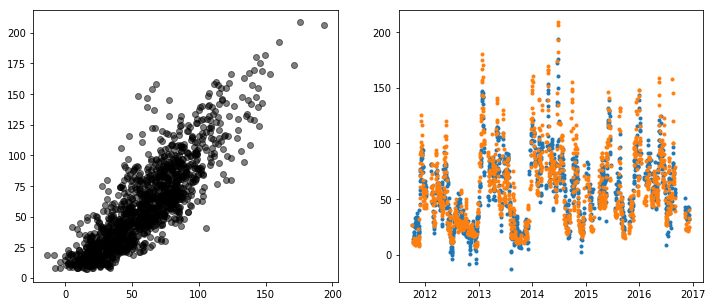

In [619]:
lr = LinearRegression()
#data = df.dropna().apply(np.log)
#data = data.replace([np.inf, -np.inf], np.nan)
data = df.dropna()
X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

0.591243595796


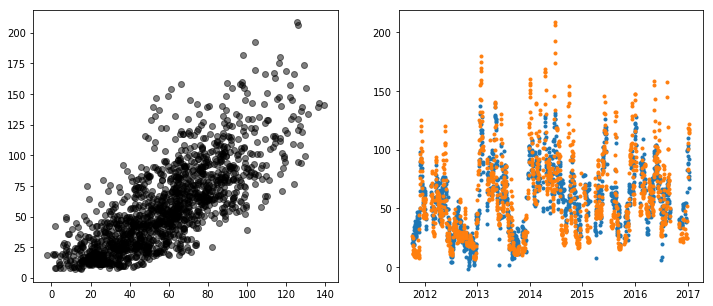

In [620]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

lr = LinearRegression()
data = df.dropna()

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
# create the RFE model and select 10 attributes
rfe = RFE(lr, 50)
rfe = rfe.fit(X, y)
# #summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

cols = X.columns[rfe.support_]
group = list(cols)
group.append('turbidity')
# sns.pairplot(df[[<insert the columns of your df here>]])
# sns.heatmap(df[group].corr())     #<---- will give you a good visualization of the correlation matrix

lr = LinearRegression()
data = df[group].dropna()

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

### Apply log transformation

Text(0.5,1,'discharge at Baton Rouge')

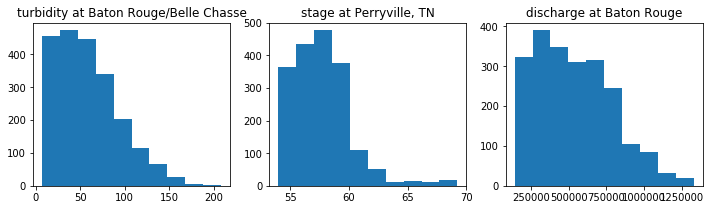

In [621]:
### check the distribution (histogram) of features
plt.subplots(figsize=(12,3))
ax = plt.subplot(1,3,1)
plt.hist(df.turbidity.dropna());
ax.set_title('turbidity at Baton Rouge/Belle Chasse')
ax =plt.subplot(1,3,2)
plt.hist(df['03594500'].dropna());
ax.set_title('stage at Perryville, TN')
ax = plt.subplot(1,3,3)
plt.hist(df['07374000'].dropna());
ax.set_title('discharge at Baton Rouge')


0.795497681407


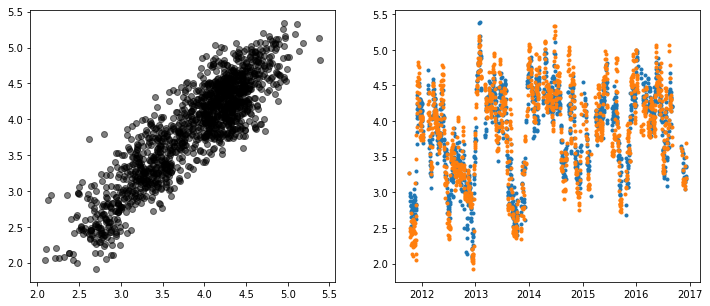

In [671]:
# apply log transformation to all variables
lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

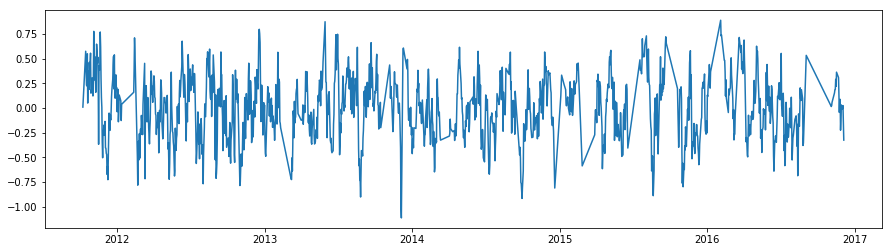

In [674]:
plt.figure(figsize=(15,4))
# plt.hist(lr.predict(X)-y,bins=20)
plt.plot(lr.predict(X)-y)


In [666]:
sklearn.metrics.r2_score(y,lr.predict(X))

0.7954976814066641

In [665]:
1-(1-0.795497681407)*1359/(1359-114)

0.7767721678972794

0.750742754434


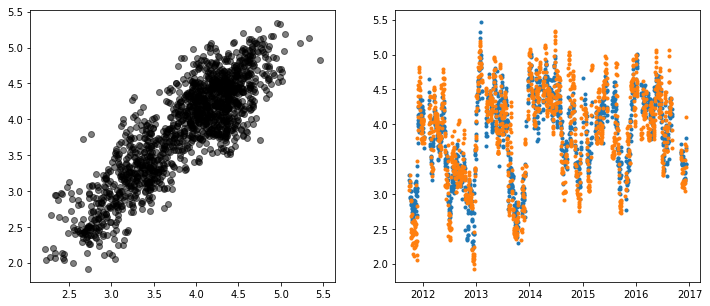

In [623]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
# create the RFE model and select 10 attributes
rfe = RFE(lr, 50)
rfe = rfe.fit(X, y)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

cols = X.columns[rfe.support_]
group = list(cols)
group.append('turbidity')
# sns.pairplot(df[[<insert the columns of your df here>]])
# sns.heatmap(df[group].corr())     #<---- will give you a good visualization of the correlation matrix

lr = LinearRegression()
data = df[group].dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

0.673390714965


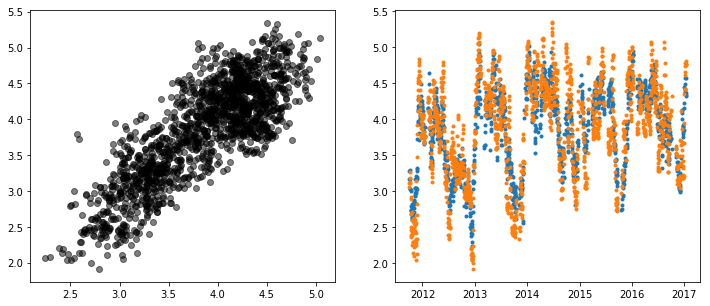

In [653]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
# create the RFE model and select 10 attributes
rfe = RFE(lr, 20)
rfe = rfe.fit(X, y)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

cols = X.columns[rfe.support_]
group20 = list(cols)
group20.append('turbidity')
# sns.pairplot(df[[<insert the columns of your df here>]])
# sns.heatmap(df[group].corr())     #<---- will give you a good visualization of the correlation matrix

lr = LinearRegression()
data = df[group20].dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

(array([   4.,    2.,   11.,   17.,   26.,   60.,   84.,   99.,  145.,
         150.,  177.,  163.,  160.,  120.,  107.,   84.,   65.,   40.,
          11.,    3.]),
 array([-1.26175949, -1.14643988, -1.03112026, -0.91580064, -0.80048102,
        -0.6851614 , -0.56984178, -0.45452216, -0.33920254, -0.22388292,
        -0.1085633 ,  0.00675632,  0.12207594,  0.23739556,  0.35271518,
         0.4680348 ,  0.58335442,  0.69867404,  0.81399366,  0.92931328,
         1.0446329 ]),
 <a list of 20 Patch objects>)

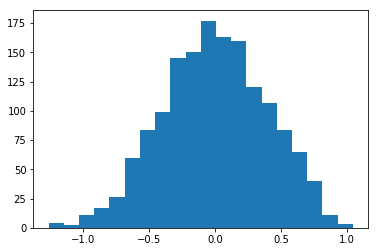

In [654]:
plt.hist(lr.predict(X)-y,bins=20)

In [655]:
import sklearn
sklearn.metrics.r2_score(lr.predict(X),y)

0.51497803908340878

#### <font color='blue'> check Durbin-Watson

In [607]:
# print selected station names
stations.loc[cols].site_name

03110690      OHIO R AT NEW CUMBERLAND LOCK & DAM (LOWER), OH
03111520         OHIO R AT PIKE ISLAND LOCK & DAM (LOWER), WV
03430250    CUMBERLAND RIVER AT STONES RIVER NEAR HERMITAG...
03430320     CUMBERLAND RIVER AT BRILEY PKWY NR INGLEWOOD, TN
03431712     CUMBERLAND RIVER AT BRILEY PKWY AT COCKRILL BEND
03594500                  TENNESSEE RIVER AT PERRYVILLE, TENN
05587060                         ILLINOIS RIVER AT HARDIN, IL
06090300                   Missouri River near Great Falls MT
06090800                     Missouri River at Fort Benton MT
06341000                       MISSOURI RIVER AT WASHBURN, ND
06342020                          MISSOURI RIVER AT PRICE, ND
06342500                       MISSOURI RIVER AT BISMARCK, ND
06441595              MISSOURI R AT FARM ISLAND NR PIERRE, SD
06610000                          Missouri River at Omaha, NE
06807000                  Missouri River at Nebraska City, NE
06813500                           Missouri River at Rulo, NE
06818000

### Explore selected features: using local station only (Baton Rouge)

In [209]:
#sns.pairplot(logdata)

0.521203060123


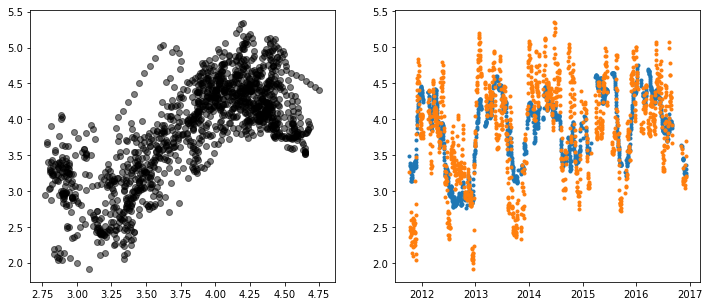

In [626]:
lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

X = data['07374000'].values.reshape(-1,1)#X = data.iloc[:,:-1]
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

### Explore selected features: using local station only (Baton Rouge)

In [643]:
data = df_raw[group20]
for st in group[:-1]:
    (cc,lag) = find_lag(data[st],data['turbidity'])
    print('%s: %d, %f'%(st,lag,cc))
    if lag > 0:
        data[st] = data[st].shift(lag)

03110690: 12, 0.344509
03111520: 11, 0.355354

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



03430250: 7, 0.376406
03430320: 8, 0.372431
03431712: 8, 0.361463
03594500: 4, 0.458635
05587060: 0, 0.281248
06090300: 0, 0.144565
06090800: 0, 0.119883
06341000: 10, 0.172073
06342020: 0, 0.174075
06342500: 0, 0.003741
06441595: 1, -0.108562
06610000: 0, -0.112311
06807000: 0, -0.001131
06813500: 0, 0.034795
06818000: 16, 0.067500
07022000: 0, 0.320090
07374000: 0, 0.464427
07020850: 0, 0.337528


In [644]:
data.describe()

,03110690,03111520,03430250,03430320,03431712,03594500,05587060,06090300,06090800,06341000,...,06342500,06441595,06610000,06807000,06813500,06818000,07022000,07374000,07020850,turbidity
count,2138.000000,2157.000000,2173.000000,2176.000000,2184.000000,1868.00000,2180.000000,2192.000000,2192.000000,2176.000000,...,2192.000000,2188.000000,2191.000000,2192.000000,2192.000000,2176.000000,2.192000e+03,2.173000e+03,2162.000000,2133.000000
mean,15.257755,15.531484,22.981404,24.918594,16.604226,57.70296,21.838486,6032.098540,6171.163321,10.429288,...,22009.762774,21.290558,33854.313099,42098.403285,45661.268248,48398.759191,2.462018e+05,5.349627e+05,20.124968,58.842733
std,2.681828,3.102294,4.728393,4.009607,2.088129,2.45947,3.537527,2254.673502,2348.266083,1.519676,...,5651.651470,0.436297,9738.619086,13138.813774,16038.011979,18328.330268,1.518872e+05,2.566121e+05,8.743033,35.005728
min,12.410000,12.220000,17.920000,20.540000,14.080000,53.99000,18.790000,2230.000000,2400.000000,8.000000,...,12000.000000,19.780000,12300.000000,15600.000000,18100.000000,18300.000000,6.500000e+04,1.410000e+05,4.860000,6.800000
25%,13.330000,13.240000,19.130000,21.800000,15.140000,55.88000,19.730000,4620.000000,4610.000000,9.500000,...,17600.000000,20.990000,28400.000000,35875.000000,37100.000000,37800.000000,1.320000e+05,3.200000e+05,13.510000,30.000000
50%,14.200000,14.360000,20.810000,22.950000,15.600000,57.36000,20.460000,5390.000000,5430.000000,10.150000,...,21500.000000,21.245000,34000.000000,40000.000000,42300.000000,44600.000000,2.050000e+05,5.050000e+05,19.175000,52.900000
75%,16.320000,16.770000,26.390000,27.582500,17.662500,58.86250,22.200000,6570.000000,6910.000000,11.240000,...,24600.000000,21.550000,38550.000000,48125.000000,53500.000000,56900.000000,3.140000e+05,7.070000e+05,25.507500,80.300000
max,28.790000,31.850000,38.660000,39.960000,26.100000,69.24000,36.770000,17200.000000,16800.000000,16.770000,...,36900.000000,23.470000,96300.000000,120000.000000,121000.000000,144000.000000,1.030000e+06,1.330000e+06,48.770000,208.500000


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.658453101823


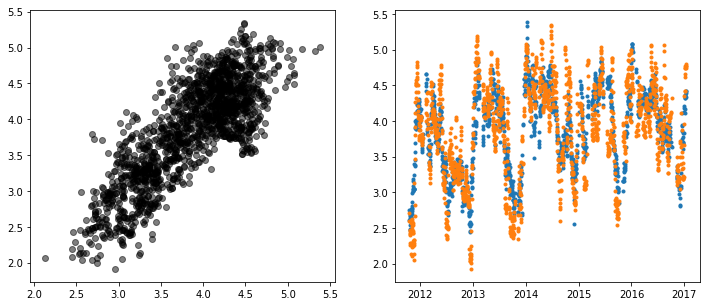

In [645]:
data['Qsum'] = data.drop('turbidity',axis=1).sum(axis=1)
data = data.dropna().apply(np.log).dropna()
X = data.drop('turbidity',axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

In [642]:
data.describe()

,03110690,03111520,03430250,03430320,03431712,03594500,05587060,06090300,06090800,06341000,...,06441595,06610000,06807000,06813500,06818000,07022000,07374000,07020850,turbidity,Qsum
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,2.692059,2.705333,3.105137,3.196006,2.796982,4.055373,3.063421,8.645021,8.666322,2.326447,...,3.057522,10.392533,10.602231,10.672388,10.721104,12.214315,13.017283,2.871412,3.848375,14.386156
std,0.145178,0.162943,0.195308,0.150918,0.116734,0.039959,0.132057,0.301010,0.313417,0.125246,...,0.020816,0.307035,0.315150,0.345352,0.363399,0.588150,0.532513,0.484165,0.698744,0.402200
min,2.518503,2.503074,2.885917,3.022374,2.648300,3.989169,2.936513,7.709757,7.783224,2.079442,...,2.984671,9.417355,9.655026,9.803667,9.814656,11.082143,11.856515,1.581038,1.916923,13.484335
25%,2.584752,2.580217,2.944965,3.079154,2.714032,4.026601,2.981633,8.427268,8.429454,2.264883,...,3.043093,10.281924,10.496814,10.524064,10.542706,11.751942,12.587928,2.559550,3.341093,14.096641
50%,2.638343,2.647592,3.012098,3.119276,2.742130,4.050044,3.012098,8.599694,8.605204,2.310553,...,3.054944,10.439981,10.594132,10.645425,10.707729,12.185870,13.110291,2.918851,3.945458,14.406209
75%,2.750471,2.779440,3.265759,3.311273,2.863343,4.074992,3.089678,8.800867,8.850804,2.404239,...,3.069447,10.563595,10.781037,10.887437,10.950807,12.660328,13.451667,3.239462,4.390739,14.721063
max,3.360028,3.461037,3.654805,3.639427,3.216874,4.237579,3.604682,9.752665,9.729134,2.819592,...,3.155723,11.475224,11.695247,11.703546,11.877569,13.845069,13.989464,3.887115,5.339939,15.280337
